# CPSC 330 - Applied Machine Learning 

## Homework 5: Evaluation metrics
### Associated lectures: [Lectures 9, 10](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Feb 27, 2023 at 11:59pm**

## Imports

In [1]:
import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Instructions 
<hr>
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Exercise 1: Precision, recall, and f1 score by hand <a name="1"></a>
<hr>

Consider the problem of predicting whether a patient has cancer or not. It is important to catch this disease early to reduce mortality rate; late diagnosis will result in metastasis to other organs, which adversely impacts patient's prognosis. Below are confusion matrices of two machine learning models: Model A and Model B. 

- Model A

|         | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 48 | 32 |
| **Actual no disease**       | 20 | 100 |


- Model B

|        | Predicted disease | Predicted no disease |
| :------------- | -----------------------: | -----------------------: |
| **Actual disease**       | 43 | 22 |
| **Actual no disease**       | 35 | 100 |

### 1.1 Positive vs. negative class 
rubric={points:2}

**Your tasks:**

Precision, recall, and f1 score depend upon which class is considered "positive", that is the thing you wish to find. In the example above, which class is likely to be the "positive" class? Why? 

<br><br>

### 1.2 Accuracy
rubric={points:2}

**Your tasks:**

Calculate accuracies for Model A and Model B. 

We'll store all metrics associated with Model A and Model B in the `results_dict` below. 

In [2]:
results_dict = {"A": {}, "B": {}}

In [3]:
results_dict["A"]["accuracy"] = None
results_dict["B"]["accuracy"] = None

In [4]:
pd.DataFrame(results_dict)

,A,B
accuracy,None,None


In [5]:
# Soluion
# accuracy = (tp + tn) / (tp+tn+fp+fn)

a_tp = 48
a_fn = 32
a_fp = 20
a_tn = 100
results_dict["A"]["accuracy"] = (a_tp+a_tn)/(a_tp+a_tn+a_fn+a_fp)

b_tp = 43
b_fn = 22
b_fp = 35
b_tn = 100
results_dict["B"]["accuracy"] = (b_tp+b_tn)/(b_tp+b_tn+b_fn+b_fp)

<br><br>

### 1.3 Which model would you pick? 
rubric={points:1}

**Your tasks:**

Which model would you pick simply based on the accuracy metric? 

---- Solution -----  
Model A has higher accuracy; so, based on accuracy, model A is better.


<br><br>

### 1.4 Precision, recall, f1-score
rubric={points:6}

**Your tasks:**

1. Calculate precision, recall, f1-score for Model A and Model B manually, without using `scikit-learn` tools. 


In [6]:
results_dict["A"]["precision"] = None
results_dict["B"]["precision"] = None
results_dict["A"]["recall"] = None
results_dict["B"]["recall"] = None
results_dict["A"]["f1"] = None
results_dict["B"]["f1"] = None

Show the dataframe with all results. 

In [7]:
pd.DataFrame(results_dict)

,A,B
accuracy,0.74,0.715
precision,NaN,NaN
recall,NaN,NaN
f1,NaN,NaN


In [8]:
# solution

# precision = tp / (tp+fp)
# recall = tp / (tp+fn)
# f1 = 2 * precision * recall / (precision + recall)

a_tp = 48
a_fn = 32
a_fp = 20
a_tn = 100
results_dict["A"]["precision"] = a_tp / (a_tp+a_fp)
results_dict["A"]["recall"] = a_tp / (a_tp + a_fn)
results_dict["A"]["f1"] = (
    2 * results_dict["A"]["precision"] * results_dict["A"]["recall"] / 
    (results_dict["A"]["recall"] + results_dict["A"]["precision"])
)

b_tp = 43
b_fn = 22
a_fp = 35
a_tn = 100

results_dict["B"]["precision"] = b_tp / (b_tp+a_fp)
results_dict["B"]["recall"] = b_tp / (b_tp+b_fn)
results_dict["B"]["f1"] = (
    2 * results_dict["B"]["precision"] * results_dict["B"]["recall"] / 
    (results_dict["B"]["recall"] + results_dict["B"]["precision"])
)


<br><br>

### 1.5 Discussion
rubric={points:4}

**Your tasks:**
1. Given the type of problem (early cancer diagnosis), which metric is more informative in this problem? Why? 
2. Which model would you pick based on this information? 

------ solution -----

1. Since the disease is deadly (cancer), the patient going undiagnosed comes with a big penalty. So, we prefer a high "recall" to make sure we run more tests and get the right diagnosis as soon as possible.

2. Based on the results, model B has higher recall and is the better model, even though it has lower precision, lower accuracy and lower F1 score. 

<br><br>

### (Optional) 1.6 
rubric={points:1}

**Your tasks:**

Provide 2 to 3 example classification datasets (with links) where accuracy metric would be misleading. Discuss which evaluation metric would be more appropriate for each dataset. You may consider datasets we have used in this course so far. You could also look up datasets on Kaggle. 

---- solution ----

The question is open-ended. General datasets which matches this question could be:
- Most imbalanced datasets
  - e.g. Anomaly detection dataset (fraud, spam, phishing, financial/transaction/network fraudulent activity, etc.)
- Any problem where naturally precision or recall are better candidates, such as most medical diagnosis, etc.
- And any other datasets where the student can justify their answers.

<br><br><br><br>

### Exercise 2: Classification evaluation metrics using `sklearn` <a name="2"></a>
<hr>

In general, when a dataset is imbalanced, accuracy does not provide the whole story. In class, we looked at credit card fraud dataset which is a classic example of an imbalanced dataset. 

Another example is customer churn datasets. [Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). Once you have the data, you should be able to run the following code:

The starter code below reads the data CSV as a pandas dataframe and splits it into 70% train and 30% test. 

Note that `churn` column in the dataset is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.

> Note that for this kind of problem a more appropriate technique is something called survival analysis and we'll be talking about it later in the course. For now, we'll just treat it as a binary classification problem. 

In [9]:
df = pd.read_csv("bigml_59c28831336c6604c800002a.csv", encoding="utf-8")
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,...,77,17.40,256.6,101,11.55,5.7,4,1.54,1,False
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,...,76,12.10,91.2,86,4.10,10.9,5,2.94,2,False
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,...,103,7.62,220.0,91,9.90,15.6,4,4.21,2,False
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,...,105,13.86,282.5,100,12.71,10.0,3,2.70,1,False
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,...,95,22.23,241.6,104,10.87,11.4,9,3.08,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,WY,126,408,339-9798,yes,no,0,197.6,126,33.59,...,112,20.95,285.3,104,12.84,12.5,8,3.38,2,False
3089,WV,70,510,348-3777,no,yes,30,143.4,72,24.38,...,92,14.45,127.9,68,5.76,9.4,4,2.54,3,False
1766,NJ,125,415,406-6400,no,no,0,182.3,64,30.99,...,121,11.88,171.6,96,7.72,11.6,7,3.13,2,False
1122,NE,159,415,362-5111,no,no,0,189.1,105,32.15,...,147,20.92,242.0,106,10.89,10.4,5,2.81,1,True


<br><br>

### 2.1 Distribution of target values
rubric={points:4}

**Your tasks:**

Examine the distribution of target values in the train split. Do you see class imbalance? If yes, do we need to deal with it? Why or why not? 

<br><br>

In [10]:
# solution

print(train_df['churn'].value_counts())
# or
print(train_df['churn'].value_counts(normalize=True))

False    1984
True      349
Name: churn, dtype: int64
False    0.850407
True     0.149593
Name: churn, dtype: float64


------- solution -----

Yes, there is account imbalance; 1984 (nearly 85%) False vs. 349 (nearly 15%) True.

We are likely to be interested in finding churned customers so that the company can offer them promotions etc and so predicting "True" examples correctly is more important to us. The imbalance is 6 to 1, which is not negligible. We need to deal with it to ensure that True class is well represented.

However, it is also acceptable if the student responds with a statement similar to: "There is imbalance, however, whether we need to deal with it or not depends on the model and an empirical study where we train the model and evaluate its performance; until then, we cannot be 100% certain whether we need to deal with the imbalance or not. Generally speaking, the imbalance is going to harm the performance of our model."

### (Optional) 2.2 EDA 
rubric={points:1}

**Your tasks:**

Come up with **two** exploratory questions you would like to answer and explore those. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 10) but you don't have to.

-------- solution ----   
Open ended question. Optional with only one point. Use your own judgement and if the student made a decent effort, credit them for that.

In [11]:
# one of the many possible EDAs could be to explore the correlation between features
train_df.corr()
# And then explore the correlations between features to realize that "total day minutes" and "total day charge" 
# are highly correlated. Same is true for "total eve charge" and "total eve minute", and some others.

/var/folders/0g/cybzqbz532b9hm0z1_98t1nc0000gn/T/ipykernel_15935/864959007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.001182,-0.014392,0.004172,0.041893,0.004172,-0.007104,0.007933,-0.007079,-0.022323,-0.018192,-0.022311,0.012221,0.007324,0.012280,-0.006801,0.030816
area code,-0.001182,1.000000,-0.010420,-0.018004,-0.000605,-0.018000,0.008661,0.004977,0.008698,0.007058,0.038585,0.007019,-0.024145,-0.032345,-0.024228,0.025106,-0.007699
number vmail messages,-0.014392,-0.010420,1.000000,-0.011443,-0.001229,-0.011445,-0.006903,0.001281,-0.006877,-0.015654,0.005661,-0.015692,0.007540,0.005228,0.007516,0.000817,-0.079242
total day minutes,0.004172,-0.018004,-0.011443,1.000000,-0.005629,1.000000,0.023442,0.031951,0.023441,0.007811,0.015868,0.007758,-0.005937,-0.002756,-0.005812,-0.021350,0.215746
total day calls,0.041893,-0.000605,-0.001229,-0.005629,1.000000,-0.005626,-0.015018,0.009994,-0.015008,0.030066,-0.007456,0.030064,0.005074,0.005216,0.005156,-0.020813,0.016546
total day charge,0.004172,-0.018000,-0.011445,1.000000,-0.005626,1.000000,0.023457,0.031956,0.023456,0.007816,0.015864,0.007762,-0.005940,-0.002758,-0.005814,-0.021356,0.215749
total eve minutes,-0.007104,0.008661,-0.006903,0.023442,-0.015018,0.023457,1.000000,-0.000852,1.000000,-0.025507,0.013250,-0.025524,-0.007664,-0.008652,-0.007760,-0.026125,0.087715
total eve calls,0.007933,0.004977,0.001281,0.031951,0.009994,0.031956,-0.000852,1.000000,-0.000838,0.005060,0.002709,0.005108,0.013521,0.027803,0.013485,0.011812,0.024840
total eve charge,-0.007079,0.008698,-0.006877,0.023441,-0.015008,0.023456,1.000000,-0.000838,1.000000,-0.025504,0.013255,-0.025521,-0.007682,-0.008652,-0.007778,-0.026142,0.087705
total night minutes,-0.022323,0.007058,-0.015654,0.007811,0.030066,0.007816,-0.025507,0.005060,-0.025504,1.000000,0.006018,0.999999,-0.021817,-0.022329,-0.021844,-0.009440,0.026606


<br><br>

### 2.3 Column transformer 
rubric={points:14}

The code below creates `X_train`, `y_train`, `X_test`, `y_test` for you. 
In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

For each group of features (e.g. numeric, categorical or else) explain why you are applying the particular transformation. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

Finally, fit `ColumnTransformer` on your training set; and use the `ColumnTransformer` to transform your train data.

In [12]:
X_train = train_df.drop(columns=["churn"])
X_test = test_df.drop(columns=["churn"])

y_train = train_df["churn"]
y_test = test_df["churn"]

In [13]:
# solution
X_train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
1402,NE,70,415,421-8535,no,no,0,213.4,86,36.28,204.7,77,17.40,256.6,101,11.55,5.7,4,1.54,1
1855,WI,67,510,417-2265,no,no,0,109.1,134,18.55,142.3,76,12.10,91.2,86,4.10,10.9,5,2.94,2
633,NJ,122,415,327-9341,no,yes,34,146.4,104,24.89,89.7,103,7.62,220.0,91,9.90,15.6,4,4.21,2
1483,NV,107,510,419-9688,yes,no,0,234.1,91,39.80,163.1,105,13.86,282.5,100,12.71,10.0,3,2.70,1
2638,HI,105,510,364-8128,no,no,0,125.4,116,21.32,261.5,95,22.23,241.6,104,10.87,11.4,9,3.08,2


In [14]:
print(train_df["international plan"].unique())
print(train_df["voice mail plan"].unique())
print(train_df["area code"].unique())
print(train_df["state"].unique())
train_df["state"].unique()


['no' 'yes']
['no' 'yes']
[415 510 408]
['NE' 'WI' 'NJ' 'NV' 'HI' 'NM' 'MO' 'MI' 'SD' 'WY' 'GA' 'WV' 'KS' 'DC'
 'CT' 'TN' 'AK' 'WA' 'MS' 'CA' 'ND' 'MD' 'AZ' 'RI' 'SC' 'AL' 'MA' 'ME'
 'AR' 'VA' 'FL' 'NY' 'DE' 'NH' 'MN' 'KY' 'NC' 'OK' 'OR' 'ID' 'IN' 'LA'
 'UT' 'PA' 'TX' 'OH' 'MT' 'IA' 'VT' 'IL' 'CO']


array(['NE', 'WI', 'NJ', 'NV', 'HI', 'NM', 'MO', 'MI', 'SD', 'WY', 'GA',
       'WV', 'KS', 'DC', 'CT', 'TN', 'AK', 'WA', 'MS', 'CA', 'ND', 'MD',
       'AZ', 'RI', 'SC', 'AL', 'MA', 'ME', 'AR', 'VA', 'FL', 'NY', 'DE',
       'NH', 'MN', 'KY', 'NC', 'OK', 'OR', 'ID', 'IN', 'LA', 'UT', 'PA',
       'TX', 'OH', 'MT', 'IA', 'VT', 'IL', 'CO'], dtype=object)

Result of exploration:

1. One-hot encode `area code`, `international plan` and `voice mail plan`, `state`. 
  - Use `drop=if_binary` for `international plan` and `voice mail plan` as they are binary and we will avoid adding an extra column for their OHE.
2. Drop `phone number`, as it is a unique identifier that is unlikely to be useful.
3. Treat the rest of the columns as numeric and standardize them.

In [15]:
categorical_features = ["area code", "state"]
binary_features = ["international plan", "voice mail plan"]
drop_features = ["phone number"]
numeric_features = list(
    set(train_df.columns)
    - set(["churn"])
    - set(binary_features)
    - set(categorical_features)
    - set(drop_features)
)

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ("drop", drop_features),
)

preprocessor.fit(X_train);
X_train_enc = preprocessor.transform(X_train)

<br><br>

<br><br>

### 2.4 area code feature
rubric={points:4}

The original dataset had a feature called `area code`.

1. The area codes are numbers. Does it make sense to encode them as one-hot-endoded (OHE) or not? Please justify your response.
2. What were the possible values of `area code`? 
3. If area code is encoded with OHE, how many new features are created to replace it?

----- solution ------

1. OHE of area codes make sense and is the right approach because the numbers in area code are meaningless (e.g. there is not particular relationship between a sample with area code 100 and another with area code 200). Area code is actually categorical.

2. 

In [16]:
X_train["area code"].unique()

array([415, 510, 408])

3. Based on answer of 2, the answer is: Three new features

In [17]:
# or the student might write a code like this
len(X_train["area code"].unique())

3

<br><br>

<br><br>

### 2.5 Logistic regression
rubric={points:12} 

**Your tasks:**

1. Report the cross-validation results of a `LogisticRegression` model, with default Hparams, on the following metrics: `"accuracy", "precision", "recall", "f1"`
2. Are you satisfied with the results? Explain why or why not. Discuss in a few sentences. 

In [18]:
# solution
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
score_types = ["accuracy", "precision", "recall", "f1"]
for score_type in score_types:
    print(
        "%-9s: %.2f"
        % (
            score_type,
            cross_val_score(pipe, X_train, y_train, scoring=score_type).mean(),
        )
    )

accuracy : 0.86
precision: 0.55
recall   : 0.21
f1       : 0.30


2. The resluts are very bad. 
  - The `accuracy` is 86% and considering that 85% of the train dataset belonging to the False churn class, this number cannot be trusted. 
  - Based on the `precision`, we can only trust 55% of samples as churn selected by the model. 
  - Based on the low `recall`, the model is catching only 21% of the churns.

<br><br>

### 2.6 Logistic regression with `class_weight`
rubric={points:6}

**Your tasks:**

1. Set the `class_weight` parameter of your logistic regression model to `'balanced'` and report the same metrics as in the previous part. 
2. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences while comparing the metrics of this model and the previous model.

In [19]:
# solution

pipe_balanced = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
for score_type in score_types:
    print(
        "%-9s: %.2f"
        % (
            score_type,
            cross_val_score(pipe_balanced, X_train, y_train, scoring=score_type).mean(),
        )
    )

accuracy : 0.76
precision: 0.35
recall   : 0.70
f1       : 0.47


We prefer this model.
Our accuracy is now lower, but the recall is now much better and precision is higher. The F1-score is better now as well. Since this is a spotting problem, we care much more about our precision and recall.

<br><br>

### 2.7 Hyperparameter optimization
rubric={points:10}

1. Jointly optimize `C` and `class_weight` with `GridSearchCV` and `scoring="f1"`.
  - For `class_weight`, consider 3 values: 
    - `None` (no weight)
    - "weight of class 0 = 1"  and  "weight of class 1 = 3"
    - '`balanced`'
  - For `C`, choose some reasonable values
2. What values of `C` and `class_weight` are chosen and what is the best cross-validation f1 score?

1. Because `C` is asked to be chosen from a "reasonable set", each student might choose a different set and results might slightly differ based on the selection. Student's decision on `C` is also part of their answer and they are expected to `exponentially` increase the value of `C` from a small value to a medium or large value.


In [20]:
# solution

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
param_grid = {
    "logisticregression__C": 2.0 ** np.arange(-4, 4),
    "logisticregression__class_weight": [None, {0:1, 1:3}, "balanced"],
}
search = GridSearchCV(
    pipe,
    param_grid,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
)
search.fit(X_train, y_train);

# Fitting 5 folds for each of 16 candidates, totalling 80 fits
grid_results_df = pd.DataFrame(search.cv_results_)[
    [
        "mean_test_score",
        "mean_train_score",
        "param_logisticregression__C",
        "param_logisticregression__class_weight",
        "rank_test_score",
    ]
]
grid_results_df = grid_results_df.sort_values(by="mean_test_score", ascending=False)
grid_results_df

Fitting 5 folds for each of 24 candidates, totalling 120 fits


,mean_test_score,mean_train_score,param_logisticregression__C,param_logisticregression__class_weight,rank_test_score
4,0.490660,0.516213,0.125,"{0: 1, 1: 3}",1
7,0.489490,0.522384,0.25,"{0: 1, 1: 3}",2
10,0.488836,0.529784,0.5,"{0: 1, 1: 3}",3
13,0.485411,0.527371,1.0,"{0: 1, 1: 3}",4
2,0.481077,0.496341,0.0625,balanced,5
16,0.478248,0.530394,2.0,"{0: 1, 1: 3}",6
19,0.477508,0.531742,4.0,"{0: 1, 1: 3}",7
5,0.477458,0.503381,0.125,balanced,8
22,0.477369,0.533180,8.0,"{0: 1, 1: 3}",9
8,0.475169,0.507852,0.25,balanced,10


2. First row of the above DataFrame holds the best results.

best cross-validation f1 score = 0.490660


for the following HParam set:
- C=0.125
- class_weight={0:1, 1:3}


(because of different `C` selections, expect different final results from the students)


<br><br>

### 2.8 Test results
rubric={points:10}

**Your tasks**
1. Evaluate the best model on the test set. In particular show each of the following on the test set:  
    - Plot Confusion matrix
    - Plot Precision-recall curve 
    - Calculate average precision score
    - Plot ROC curve
    - Report AUC score
3. Comment on the AUC score and give an intuitive explanation of what this value of AUC means for this problem.

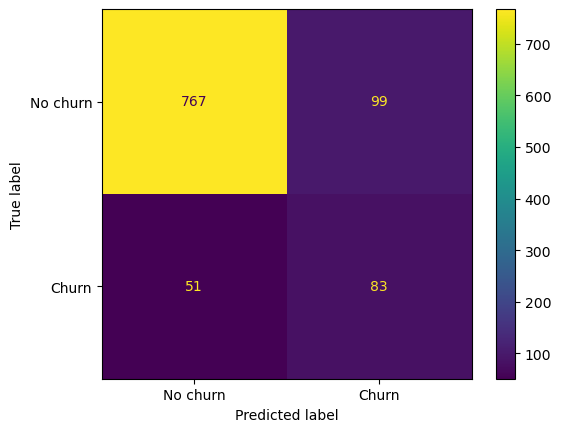

In [21]:
# solution
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

disp = ConfusionMatrixDisplay.from_estimator(
    search, X_test, y_test, display_labels=["No churn", "Churn"]
)

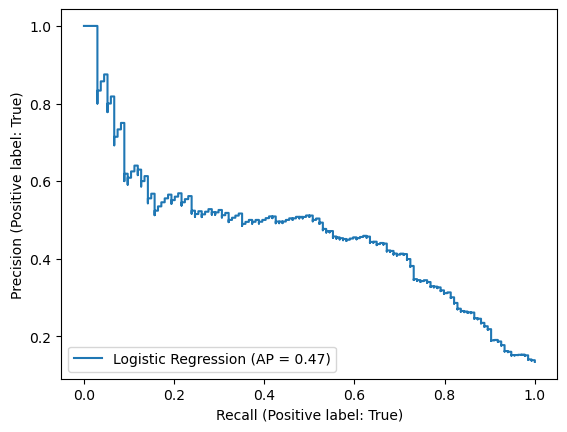

In [22]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(
    search, X_test, y_test, name="Logistic Regression"
)

In [23]:
from sklearn.metrics import average_precision_score
y_test_pred = search.predict_proba(X_test)[:, 1]
average_precision_score(y_test, y_test_pred)

0.4657998121352203

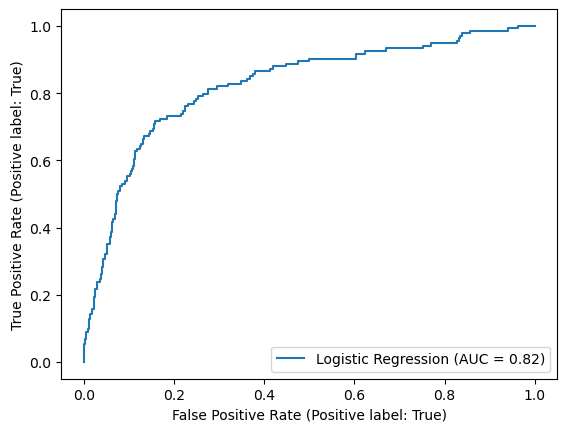

In [24]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(search, X_test, y_test, name="Logistic Regression")

In [25]:
from sklearn.metrics import roc_auc_score

print("AUC score: %0.3f" % (roc_auc_score(y_test, y_test_pred)))

AUC score: 0.824


2. AUC is 0.824. So on average about 82.4% of the times a randomly selected positive sample from the test set has a higher score (probability of belonging to the positive class) compared to a randomly selected negative sample.

<br><br><br><br>

### Exercise 3: Regression metrics <a name="3"></a>
<hr> 


For this exercise, we'll use [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) from `sklearn datasets`. The code below loads the dataset.  

In [26]:
from sklearn.datasets import fetch_california_housing

housing_df = fetch_california_housing(as_frame=True).frame

### 3.1: Data spitting and exploration 
rubric={points:4}

**Your tasks:**

1. Split the data into train (75%) and test (25%) splits. 
2. Explore the train split. Do you need to apply any transformations on the data? If yes, create a preprocessor with the appropriate transformations. 
3. Separate `X` and `y` to train and test splits. 

In [27]:
# solution

train_df, test_df = train_test_split(housing_df, test_size=0.25, random_state=123)
train_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19995,1.0349,6.0,4.165217,0.982609,734.0,3.191304,36.19,-119.35,0.678
17889,4.7625,13.0,5.265207,1.002433,1087.0,2.644769,37.41,-121.95,1.375
1977,3.5192,9.0,8.747475,1.845118,796.0,2.680135,38.61,-120.44,0.980
6861,2.8672,30.0,4.635616,1.090411,1130.0,3.095890,34.06,-118.13,1.985
11247,4.1276,13.0,4.429936,0.963376,1749.0,2.785032,33.81,-118.00,1.538


In [28]:
train_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.875935,28.550000,5.421818,1.095860,1437.431137,3.073942,35.626601,-119.568380,2.074085
std,1.900729,12.546577,2.519280,0.492851,1131.575270,10.971330,2.135537,2.001982,1.156051
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.433750,1.005778,791.000000,2.429227,33.930000,-121.800000,1.203000
50%,3.534300,29.000000,5.228714,1.048412,1173.000000,2.815468,34.250000,-118.490000,1.805000
75%,4.750375,37.000000,6.047297,1.099043,1742.000000,3.278071,37.710000,-118.010000,2.655000
max,15.000100,52.000000,141.909091,34.066667,28566.000000,1243.333333,41.950000,-114.310000,5.000010


2. All our features are numeric. The only transformation which seems relevant here is scaling.

(If the student thought of other valid transformations, don't penalize them for being innovative; but, if their transformations did not fit the problem, please deduct points)

In [29]:
preprocessor = StandardScaler()

3. 

In [30]:
X_train, y_train = train_df.drop(columns=["MedHouseVal"]), train_df["MedHouseVal"]
X_test, y_test = test_df.drop(columns=["MedHouseVal"]), test_df["MedHouseVal"]

<br><br>

### 3.2 Baseline: Linear Regression 
rubric={points:2}

**Your tasks:**
1. Carry out cross-validation using `sklearn.linear_model.LinearRegression` with default scoring. 
2. What metric is used for scoring by default? 

In [31]:
# solution
from sklearn.linear_model import LinearRegression
dr = LinearRegression()
pd.DataFrame(cross_validate(dr, X_train, y_train, return_train_score=True)).mean()

fit_time       0.007195
score_time     0.001945
test_score     0.486547
train_score    0.606753
dtype: float64

2. default score = R2 score

<br><br>

### 3.3 Random Forest Regressor
rubric={points:7}

In this exercise, we are going to use [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) model which we haven't looked into yet. At this point you should feel comfortable using models with our usual ML workflow even if you don't know the details. We'll talk about `RandomForestRegressor` later in the course.  

The code below defines a custom scorer called `mape_scorer` and creates dictionaries for two model (`models`) and five evaluation metrics (`score_types_reg`). 

**Your tasks:**

1. Using the `models` and the evaluation metrics `score_types_reg` in the code below, carry out cross-validation with each model, by passing the evaluation metrics to `scoring` argument of `cross_validate`. Use a pipeline with the model as an estimator if you are applying any transformations. 
2. Show results as a dataframe. 
3. Interpret the results. How do the models compare to the baseline? Which model seems to be performing well with different metrics? 


In [32]:
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(),
}

score_types_reg = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "neg_root_mean_squared_error": "neg_root_mean_squared_error",
    "neg_mean_absolute_error": "neg_mean_absolute_error",
    "r2": "r2",
    "neg_mean_absolute_percentage_error": "neg_mean_absolute_percentage_error",
}

In [33]:
# solution
def score_with_metrics(models, preprocessor, scoring="f1"):
    """
    Return cross-validation scores for given models as a dataframe.

    Parameters
    ----------
    models : dict
        a dictionary with names and scikit-learn models
    scoring : list/dict/string
        scoring parameter values for cross-validation

    Returns
    ----------
        None

    """
    results_df = {}
    for (name, model) in models.items():
        pipeline = make_pipeline(preprocessor, model)
        scores = cross_validate(
            pipeline, X_train, y_train, return_train_score=True, scoring=scoring
        )
        df = pd.DataFrame(scores)
        results_df[name] = df.mean()
    return pd.DataFrame(results_df)

score_with_metrics(models, preprocessor, scoring=score_types_reg)

,Ridge,Random Forest
fit_time,0.007549,5.744862
score_time,0.003868,0.073469
test_neg_mean_squared_error,-0.678763,-0.268441
train_neg_mean_squared_error,-0.525484,-0.037829
test_neg_root_mean_squared_error,-0.808948,-0.518009
train_neg_root_mean_squared_error,-0.724900,-0.194475
test_neg_mean_absolute_error,-0.536109,-0.338906
train_neg_mean_absolute_error,-0.531897,-0.126698
test_r2,0.486522,0.798765
train_r2,0.606753,0.971686


<br><br>

### 3.4 Hyperparameter optimization 
rubric={points:1}

1. Carry out hyperparameter optimization using `RandomizedSearchCV` and `Ridge` with the following `param_dist`. The `alpha` hyperparameter of `Ridge` controls the fundamental tradeoff. Choose `neg_mean_absolute_percentage_error` as the HParam optimization metric.

2. What was the best `alpha` hyper-parameter found?

In [34]:
from scipy.stats import loguniform

param_dist = {"ridge__alpha": loguniform(1e-3, 1e3)}

In [36]:
# solution

pipe = make_pipeline(StandardScaler(), Ridge())

random_search_ridge = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=1,
    n_jobs=-1,
    scoring="neg_mean_absolute_percentage_error",
    random_state=123,
)
random_search_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('ridge', Ridge())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x182927310>},
                   random_state=123,
                   scoring='neg_mean_absolute_percentage_error', verbose=1)

2.

In [37]:
random_search_ridge.best_params_

{'ridge__alpha': 26.789982776216593}

<br><br>

### 3.5 Test results
rubric={points:4}

**Your tasks:**

Test the best model (from 3.4) on the test set based on the `neg_mean_absolute_percentage_error` score.

<br><br>

In [38]:
# solution

print("Random Search best hyperparameters: %s" % (random_search_ridge.best_params_))
print("Random Search best model score: %0.3f" % (random_search_ridge.best_score_))
print(
    "Train score on the full train set: %0.3f"
    % (random_search_ridge.score(X_train, y_train))
)
print(
    "Test score on the full test set: %0.3f"
    % (random_search_ridge.score(X_test, y_test))
)

Random Search best hyperparameters: {'ridge__alpha': 26.789982776216593}
Random Search best model score: -0.318
Train score on the full train set: -0.318
Test score on the full test set: -0.316


### 3.6 Model interpretation  
rubric={points:4}

Ridge is a linear model and it learns coefficients associated with each feature during `fit()`. 

**Your tasks:**

1. Explore coefficients learned by the `Ridge` model above as a pandas dataframe with two columns: 
   - features 
   - coefficients
2. Increasing which feature values would result in higher housing price? 

In [39]:
# solution
df = pd.DataFrame(
    data={
        "features": X_train.columns,
        "coefficients": random_search_ridge.best_estimator_.named_steps["ridge"].coef_,
    }
)
df.sort_values("coefficients")

,features,coefficients
6,Latitude,-0.873340
7,Longitude,-0.842722
2,AveRooms,-0.270699
5,AveOccup,-0.042213
4,Population,-0.002402
1,HouseAge,0.120021
3,AveBedrms,0.306563
0,MedInc,0.834197


Given this model and the dataset, increasing latitude and longitude would result in lower housing prices, whereas increasing median income, and average bedrooms would result in higher housing prices.

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 